In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp
from sympy import inverse_laplace_transform
%matplotlib inline
sp.init_printing('latex')
from IPython.display import display

In [20]:
L = 18.16e-3
R = 50
R_g = 50
r = 0.46
C = 2.2e-6

6004.03828516922*exp(-2765.96916299559*t)*sin(4168.86682836108*t)*Heaviside(t)


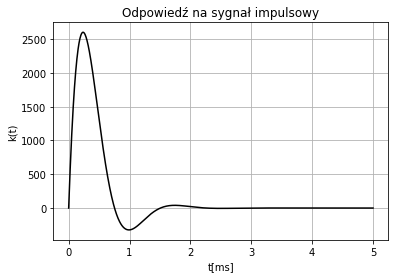

In [57]:
s, t = sp.symbols('s, t')
k_s = 1/(1+s*C*(R+R_g+r)+L*C*s**2)
k_t = inverse_laplace_transform(k_s,s,t)
print(k_t)
t = np.linspace(0,5e-3,1000)
def k_t(t):
    return 6004.04*np.exp(-2765.97*t)*np.sin(4168.87*t)
plt.plot(t*1e3,k_t(t),'k')
plt.xlabel("t[ms]")
plt.ylabel("k(t)")
plt.grid()
plt.title('Odpowiedź na sygnał impulsowy')
plt.savefig("kt.png",dpi=400)

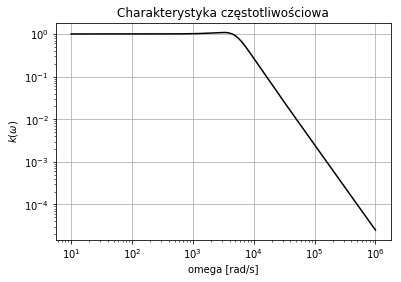

In [56]:
omega = sp.symbols('omega')
k = sp.lambdify(omega, sp.Abs(k_s.subs({s: sp.I * omega})), 'numpy')

om = np.logspace(1,6,1000)
# def h_t(t):
#     return 6004.04*np.exp(-2765.97*t)*np.sin(4168.87*t)
plt.loglog(om,k(om),'k')
plt.xlabel("omega [rad/s]")
plt.ylabel(r"$k(\omega)$")
plt.grid()
plt.title("Charakterystyka częstotliwościowa")
plt.savefig("charakterystyka_czestotliwosciowa.png", dpi=400)

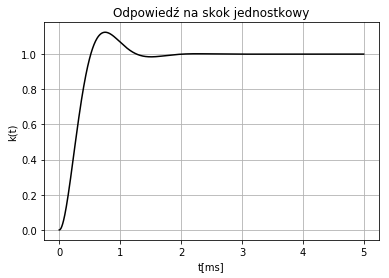

In [59]:
s, t = sp.symbols('s, t')
h_s = 1/((1+s*C*(R+R_g+r)+L*C*s**2)*s)
# h_t = inverse_laplace_transform(h_s,s,t)
h_t = 1 - (0.5 - 0.331741j)*sp.exp((-2765.97 - 4168.87j)* t) * ((0.388688 + 0.92137j) + (1)* sp.exp((8337.73j)*t))
display(h_t)
h_t = sp.lambdify(t, h_t, 'numpy')
t = np.linspace(0,5e-3,1000)
# def h_t(t):
#     return 6004.04*np.exp(-2765.97*t)*np.sin(4168.87*t)
plt.plot(t*1e3,h_t(t).real,'k')
plt.xlabel("t[ms]")
plt.ylabel("k(t)")
plt.grid()

plt.title('Odpowiedź na skok jednostkowy')
plt.savefig("ht.png",dpi=400)

(0.001228304731522134-1.8878654577808573e-07j)